# MSA 2023 Phase 2 - Part 2

In [82]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and split preprocessed data

In [83]:
# Load the CSV file

df_data_salaries = pd.read_csv('Resources/datasets/preprocessed_salaries.csv')
df_data_salaries.head(5)

,work_year,experience_level,job_title,salary_in_usd
0,3.0,3,84,85847
1,3.0,2,66,30000
2,3.0,2,66,25500
3,3.0,3,47,175000
4,3.0,3,47,120000


In [84]:
df_data_salaries.tail(5)

,work_year,experience_level,job_title,salary_in_usd
3750,0.0,3,47,412000
3751,1.0,2,84,151000
3752,0.0,0,47,105000
3753,0.0,0,17,100000
3754,1.0,3,45,94665


In [85]:
print(df_data_salaries['job_title'].nunique())

93


In [86]:
df_data_salaries.info()
df_data_salaries.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   work_year         3755 non-null   float64
 1   experience_level  3755 non-null   int64  
 2   job_title         3755 non-null   int64  
 3   salary_in_usd     3755 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 117.5 KB


,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2.373635,0.691448,0.0,2.0,2.0,3.0,3.0
experience_level,3755.0,2.469241,0.906261,0.0,2.0,3.0,3.0,3.0
job_title,3755.0,39.661784,18.536695,0.0,27.0,33.0,47.0,92.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0


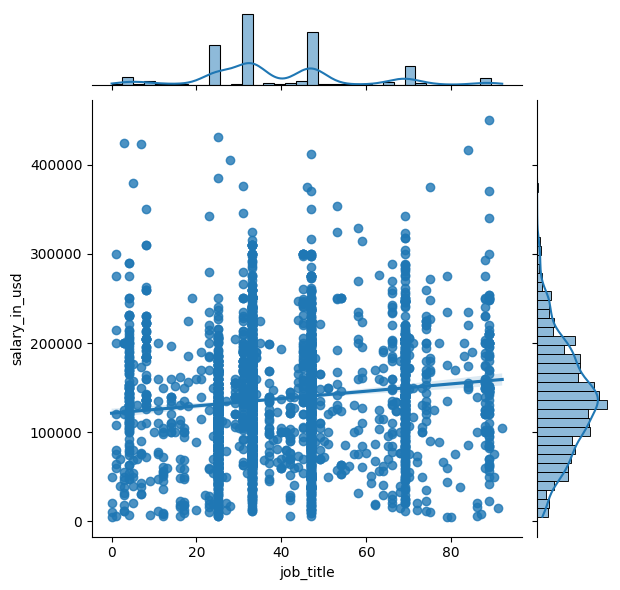

In [87]:
sns.jointplot(data=df_data_salaries, 
              x='job_title', y='salary_in_usd', kind='reg')

the data spread pretty far away from the regression line.

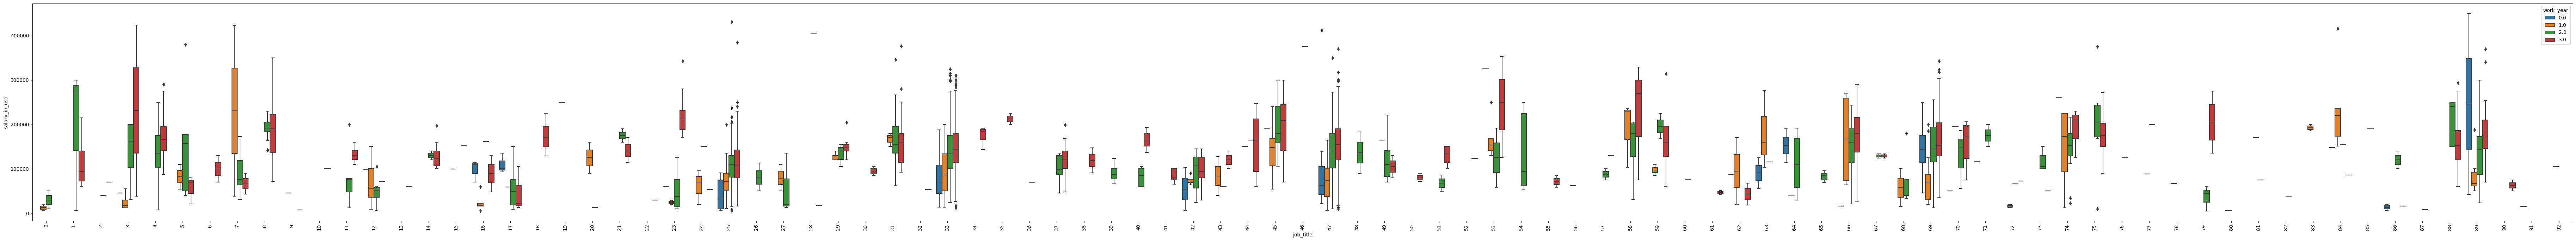

In [88]:
plt.figure(figsize=(df_data_salaries['job_title'].nunique(), 8))
sns.boxplot(data=df_data_salaries, x='job_title', y='salary_in_usd', 
              hue='work_year')
plt.xticks(rotation='vertical')
plt.show()

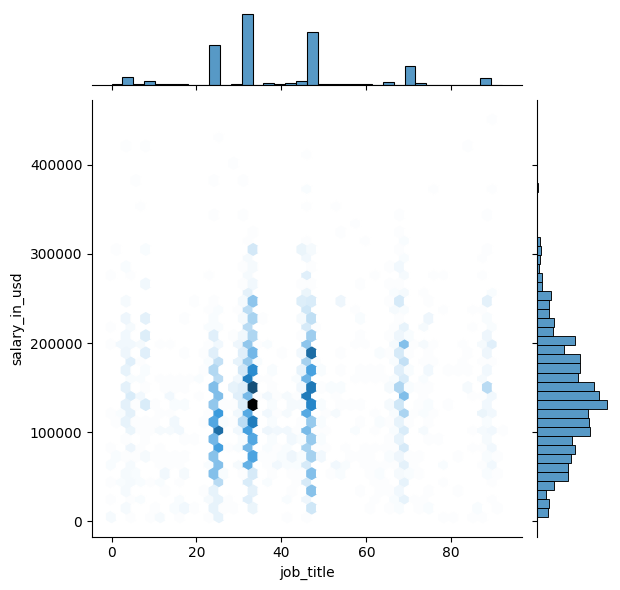

In [89]:
sns.jointplot(data=df_data_salaries, 
              x='job_title', y='salary_in_usd', kind='hex')

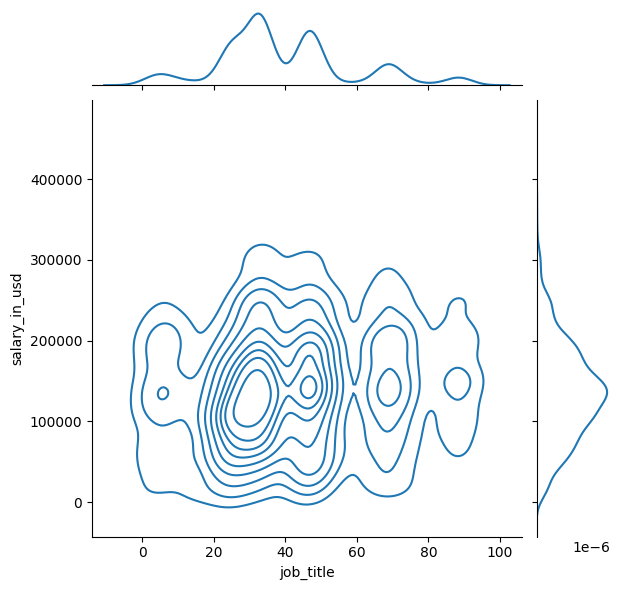

In [90]:
sns.jointplot(data=df_data_salaries, 
              x='job_title', y='salary_in_usd', kind='kde')

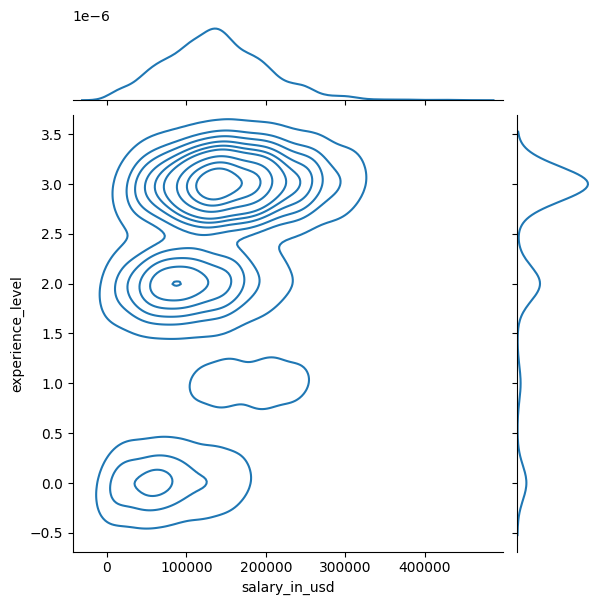

In [91]:
sns.jointplot(data=df_data_salaries, 
              x='salary_in_usd', y='experience_level', kind='kde')

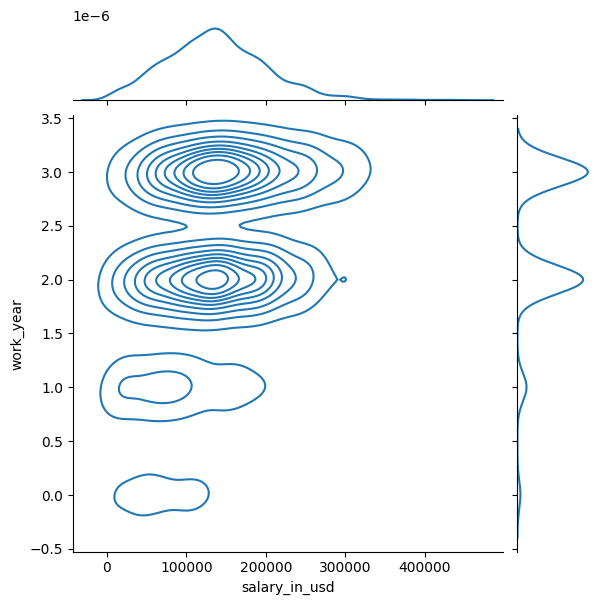

In [92]:
sns.jointplot(data=df_data_salaries, 
              x='salary_in_usd', y='work_year', kind='kde')

## 2. Choose an algorithm

In [93]:
# load the required library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [94]:
# Split data into features (X) and target (y)
X = df_data_salaries[['work_year','experience_level','job_title']]
y = df_data_salaries['salary_in_usd']

In [95]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

## 3. Train and test a model

In [96]:
# Create and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data set
y_pred = model.predict(X_test)

## 4. Evaluate the model 

In [97]:
# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3327878515.8487897


To be honest, the result is a little bit odd. 
I will see what result could be using other models.

In [98]:
# Initialize and train the Decision Tree Regressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, test_size=0.2, 
                                                    random_state=6)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 3493196418.8381286


In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, test_size=0.2, 
                                                    random_state=6)

# Initialize and train the MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,), random_state=6)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 21747991290.478867


d:\Downloads\MSA_NZ_2023\NZMSA-2023-Phase-2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [100]:
from sklearn.svm import SVR

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, test_size=0.2, 
                                                    random_state=6)

# Initialize and train the SVR model
model = SVR()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 3851349877.376732


In [101]:
from sklearn.neighbors import KNeighborsRegressor

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, test_size=0.2, 
                                                    random_state=7)

# Initialize and train the K-Nearest Neighbors Regressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 3030818056.6106524


In [107]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2, 
                                                    random_state=6)

# Initialize and train the Gradient Boosting Regression model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2765723803.1982293


## 5. Summary